In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [247]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
import random

# Blue Champion Health Bars

In [259]:
TMPL_SIZE = (150, 30)
HB_TL_CNR = np.array((28, 7))
HB_BR_CNR = np.array((146, 19))
HB_SIZE   =HB_BR_CNR-HB_TL_CNR

SB_TL_CNR = np.array((28, 22))
SB_BR_CNR = np.array((146, 25))
SB_SIZE = SB_BR_CNR - SB_TL_CNR

hb_templates = ['bchampTmplt2.png','bchampTmplt2.png','bchampTmplt2.png','bchampTmplt2.png','bchampTmplt1.png']
col_templates = ['bcol0.png','bcol1.png','bcol2.png','bcol3.png']
num_gen = 1000
out_fold ='output/'

In [387]:
def generate_hb_img(templte_hb, color_template, mask_tl_cnr, size_max, pcnt_fill, add_divs=True, 
                    resize_to=(150, 30), line_len=7, line_w = 1):
    hb_size = int(size_max[0]*pcnt_fill/100), size_max[1]
    #print(hb_size)
    im_col = color_template.resize(hb_size)
    if add_divs:
        im_col = add_hb_divs(im_col,random.randint(5, 15), size_max[0], 
                             line_len=line_len, line_w = line_w)
    templte_hb.paste(im_col, (mask_tl_cnr[0],mask_tl_cnr[1]))
    #templte_hb.show()
    return templte_hb

def hb_add_number(templte_hb, num, pos=(7,7), size=11, col=(255,255,255)):
    
    draw = ImageDraw.Draw(templte_hb)
    if num > 10:
        pos = pos[0] - 3, pos[1] 
    # font = ImageFont.truetype(<font-file>, <font-size>)
    font = ImageFont.truetype("arial", size=size)
    # draw.text((x, y),"Sample Text",(r,g,b))
    draw.text(pos,str(num), col, font=font)
    return templte_hb

def add_hb_divs(hb, n_divs, hb_max_w, col=128, line_len=7, line_w=1):
    indexs = np.linspace(0,hb_max_w, num=n_divs, endpoint=False)
    
    draw = ImageDraw.Draw(hb)
    for i in indexs[1:]:
        if i > hb.size[0]:
            break
        draw.line((i, 0) + (i, line_len), fill=128, width=line_w)
    return hb 


In [302]:
hb_imgs = [Image.open(i) for i in hb_templates]
col_imgs = [Image.open(i) for i in col_templates]

In [307]:
for i in range(num_gen):
    curr_col_img = random.choice(col_imgs).copy()
    curr_hb_img = random.choice(hb_imgs).copy()
    curr_chmp_lvl = random.randint(1, 18)
    hb_pcnt = random.randint(1, 100)
    sb_pcnt = random.randint(1, 100)
    curr_hb_img = curr_hb_img.resize((150, 30))
    hb_add_number(curr_hb_img, curr_chmp_lvl, (11,9))
    generate_hb_img(curr_hb_img, curr_col_img, mask_tl_cnr=SB_TL_CNR, size_max=SB_SIZE, pcnt_fill=sb_pcnt, add_divs=False)
    generate_hb_img(curr_hb_img, curr_col_img, mask_tl_cnr=HB_TL_CNR , size_max=HB_SIZE, pcnt_fill=hb_pcnt)
 
    curr_hb_img.save(f'{out_fold}blueHB_{i}.png')

# Red Champions

In [308]:
TMPL_SIZE = (150, 30)
HB_TL_CNR = np.array((28, 7))
HB_BR_CNR = np.array((146, 19))
HB_SIZE   =HB_BR_CNR-HB_TL_CNR

SB_TL_CNR = np.array((28, 22))
SB_BR_CNR = np.array((146, 25))
SB_SIZE = SB_BR_CNR - SB_TL_CNR

hb_templates = ['../RedChampion/rhb_template0.png', '../RedChampion/rhb_template1.png','../RedChampion/rhb_template1.png','../RedChampion/rhb_template1.png','../RedChampion/rhb_template1.png']
rcol_templates = ['../RedChampion/rcol_tmplt0.png', '../RedChampion/rcol_tmplt1.png','../RedChampion/rcol_tmplt2.png','../RedChampion/rcol_tmplt3.png','../RedChampion/rcol_tmplt4.png', '../RedChampion/rcol_tmplt5.png']
bcol_templates = ['bcol0.png','bcol1.png','bcol2.png','bcol3.png']
num_gen = 1000
out_fold ='../RedChampion/output/'

In [315]:
hb_imgs = [Image.open(i) for i in hb_templates]
rcol_imgs = [Image.open(i) for i in rcol_templates]
bcol_imgs = [Image.open(i) for i in bcol_templates]

In [327]:
for i in range(num_gen):
    curr_rcol_img = random.choice(rcol_imgs).copy()
    curr_bcol_img = random.choice(bcol_imgs).copy()
    curr_hb_img = random.choice(hb_imgs).copy()
    curr_chmp_lvl = random.randint(1, 18)
    hb_pcnt = random.randint(1, 100)
    sb_pcnt = random.randint(1, 100)
    curr_hb_img = curr_hb_img.resize((150, 30))
    hb_add_number(curr_hb_img, curr_chmp_lvl, (11,9))
    
    # Add Spell bar. BLUE in color
    generate_hb_img(curr_hb_img, curr_bcol_img, mask_tl_cnr=SB_TL_CNR, size_max=SB_SIZE, pcnt_fill=sb_pcnt, add_divs=False)
    
    # Add health bar RED
    generate_hb_img(curr_hb_img, curr_rcol_img, mask_tl_cnr=HB_TL_CNR , size_max=HB_SIZE, pcnt_fill=hb_pcnt)

    curr_hb_img.save(f'{out_fold}blueHB_{i}.png')
    

# Blue Minions

In [340]:
TMPL_SIZE = (247, 27)
HB_TL_CNR = np.array((3, 3))
HB_BR_CNR = np.array((241, 23))
HB_SIZE   =HB_BR_CNR-HB_TL_CNR

hb_templates = ['../BlueMinion/bmin_tmplt.png','../BlueMinion/Screenshot_13.png']
bcol_templates = ['bcol0.png','bcol1.png','bcol2.png','bcol3.png']
num_gen = 100
out_fold ='../BlueMinion/output/'

hb_imgs = [Image.open(i) for i in hb_templates]
bcol_imgs = [Image.open(i) for i in bcol_templates]

In [345]:
for i in range(num_gen):
    curr_bcol_img = random.choice(bcol_imgs).copy()
    curr_hb_img = random.choice(hb_imgs).copy()
    hb_pcnt = random.randint(1, 100)
    curr_hb_img = curr_hb_img.resize(TMPL_SIZE)
    
    # Add health bar Blue
    generate_hb_img(curr_hb_img, curr_bcol_img, mask_tl_cnr=HB_TL_CNR , size_max=HB_SIZE, pcnt_fill=hb_pcnt, add_divs=False)
    #hb_add_number(im_base, 5, pos=(7,7), size=13, col=(255,255,255))
    curr_hb_img.save(f'{out_fold}blueHB_{i}.png')


# Red Minions

In [349]:
TMPL_SIZE = (247, 27)
HB_TL_CNR = np.array((3, 3))
HB_BR_CNR = np.array((241, 23))
HB_SIZE   =HB_BR_CNR-HB_TL_CNR

hb_templates = ['../RedMinion/r_tmplate.png','../RedMinion/Screenshot_15.png']
bcol_templates = ['../RedChampion/rcol_tmplt0.png', '../RedChampion/rcol_tmplt1.png','../RedChampion/rcol_tmplt2.png','../RedChampion/rcol_tmplt3.png','../RedChampion/rcol_tmplt4.png', '../RedChampion/rcol_tmplt5.png']

num_gen = 500
out_fold ='../RedMinion/output/'

hb_imgs = [Image.open(i) for i in hb_templates]
bcol_imgs = [Image.open(i) for i in bcol_templates]

In [350]:
for i in range(num_gen):
    curr_bcol_img = random.choice(bcol_imgs).copy()
    curr_hb_img = random.choice(hb_imgs).copy()
    hb_pcnt = random.randint(1, 100)
    curr_hb_img = curr_hb_img.resize(TMPL_SIZE)
    
    # Add health bar Blue
    generate_hb_img(curr_hb_img, curr_bcol_img, mask_tl_cnr=HB_TL_CNR , size_max=HB_SIZE, pcnt_fill=hb_pcnt, add_divs=False)
    #hb_add_number(im_base, 5, pos=(7,7), size=13, col=(255,255,255))
    curr_hb_img.save(f'{out_fold}redHB_{i}.png')

# Blue Towers

In [357]:
TMPL_SIZE = (302, 43)
HB_TL_CNR = np.array((16, 11))
HB_BR_CNR = np.array((284, 27))
HB_SIZE   =HB_BR_CNR-HB_TL_CNR

hb_templates = ['../BlueTower/btower_tmplt.png','../BlueTower/btower18.png']
bcol_templates = ['bcol0.png','bcol1.png','bcol2.png','bcol3.png']
num_gen = 100
out_fold ='../BlueTower/output/'



hb_imgs = [Image.open(i) for i in hb_templates]
bcol_imgs = [Image.open(i) for i in bcol_templates]

In [359]:
for i in range(num_gen):
    curr_bcol_img = random.choice(bcol_imgs).copy()
    curr_hb_img = random.choice(hb_imgs).copy()
    hb_pcnt = random.randint(1, 100)
    curr_hb_img = curr_hb_img.resize(TMPL_SIZE)
    
    # Add health bar Blue
    generate_hb_img(curr_hb_img, curr_bcol_img, mask_tl_cnr=HB_TL_CNR , size_max=HB_SIZE, pcnt_fill=hb_pcnt, add_divs=True,line_len=15)
    #hb_add_number(im_base, 5, pos=(7,7), size=13, col=(255,255,255))
    curr_hb_img.save(f'{out_fold}blueHB_{i}.png')
    

# Red Tower

In [360]:
TMPL_SIZE = (302, 43)
HB_TL_CNR = np.array((16, 11))
HB_BR_CNR = np.array((284, 27))
HB_SIZE   =HB_BR_CNR-HB_TL_CNR

hb_templates = ['../RedTower/rtower_tmplt.png','../RedTower/rtower11.png']
bcol_templates = ['../RedChampion/rcol_tmplt0.png', '../RedChampion/rcol_tmplt1.png','../RedChampion/rcol_tmplt2.png','../RedChampion/rcol_tmplt3.png','../RedChampion/rcol_tmplt4.png', '../RedChampion/rcol_tmplt5.png']

num_gen = 100
out_fold ='../RedTower/output/'

hb_imgs = [Image.open(i) for i in hb_templates]
bcol_imgs = [Image.open(i) for i in bcol_templates]

In [361]:
for i in range(num_gen):
    curr_bcol_img = random.choice(bcol_imgs).copy()
    curr_hb_img = random.choice(hb_imgs).copy()
    hb_pcnt = random.randint(1, 100)
    curr_hb_img = curr_hb_img.resize(TMPL_SIZE)
    
    # Add health bar Blue
    generate_hb_img(curr_hb_img, curr_bcol_img, mask_tl_cnr=HB_TL_CNR , size_max=HB_SIZE, pcnt_fill=hb_pcnt, add_divs=True,line_len=15)
    #hb_add_number(im_base, 5, pos=(7,7), size=13, col=(255,255,255))
    curr_hb_img.save(f'{out_fold}redB_{i}.png')

#  Monster

In [364]:
TMPL_SIZE = (967, 231)
HB_TL_CNR = np.array((46, 85))
HB_BR_CNR = np.array((915, 158))
HB_SIZE   =HB_BR_CNR-HB_TL_CNR

hb_templates = ['../Monster/monster_template.png','../Monster/monster_template11.png']
bcol_templates = ['../RedChampion/rcol_tmplt0.png', '../RedChampion/rcol_tmplt1.png','../RedChampion/rcol_tmplt2.png','../RedChampion/rcol_tmplt3.png','../RedChampion/rcol_tmplt4.png', '../RedChampion/rcol_tmplt5.png']

num_gen = 300
out_fold ='../Monster/output/'

hb_imgs = [Image.open(i) for i in hb_templates]
bcol_imgs = [Image.open(i) for i in bcol_templates]

In [388]:
for i in range(num_gen):
    curr_bcol_img = random.choice(bcol_imgs).copy()
    curr_hb_img = random.choice(hb_imgs).copy()
    hb_pcnt = random.randint(1, 100)
    curr_chmp_lvl = random.randint(1, 12000)
    
    curr_hb_img = curr_hb_img.resize(TMPL_SIZE)
    
    # Add text number
    hb_add_number(curr_hb_img, curr_chmp_lvl, pos=(407,0), size=57, col=(255,255,255))
    
    # Add health bar Blue
    generate_hb_img(curr_hb_img, curr_bcol_img, mask_tl_cnr=HB_TL_CNR , size_max=HB_SIZE, pcnt_fill=hb_pcnt, add_divs=True,line_len=90, line_w = 3)
    
    curr_hb_img.save(f'{out_fold}MonstHB_{i}.png')
    

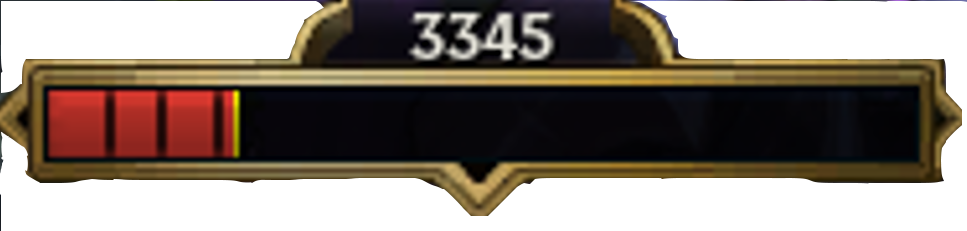

In [375]:
Image.open('../Monster/Layer 0.png')